In [22]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from pylab import rcParams
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
rcParams['figure.figsize'] = 20,20

## Observation du dataset 

In [2]:
data = pd.read_csv('C:/Users/Al_Ce/Desktop/IA/data/train.csv')

In [3]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
data.shape

(1460, 81)

In [7]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

### Analyse explorative du dataset

Faire un tableau des corrélations des features entre elles afin de savoir lesquelles sont les plus susceptibles de faire une bonne prédiction par rapport aux prix de vente

In [5]:
data.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


In [8]:
data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

Fusionner une heatmap de la librairie sns avec un tableau de corrélation afin d'avoir un tableau plus parlant, "annot = True" ajoute la présence du pourcentage à l'intérieur des carrés, "cmap" indique le jeux de couleur qui sera utilisé dans ce heatmap. 

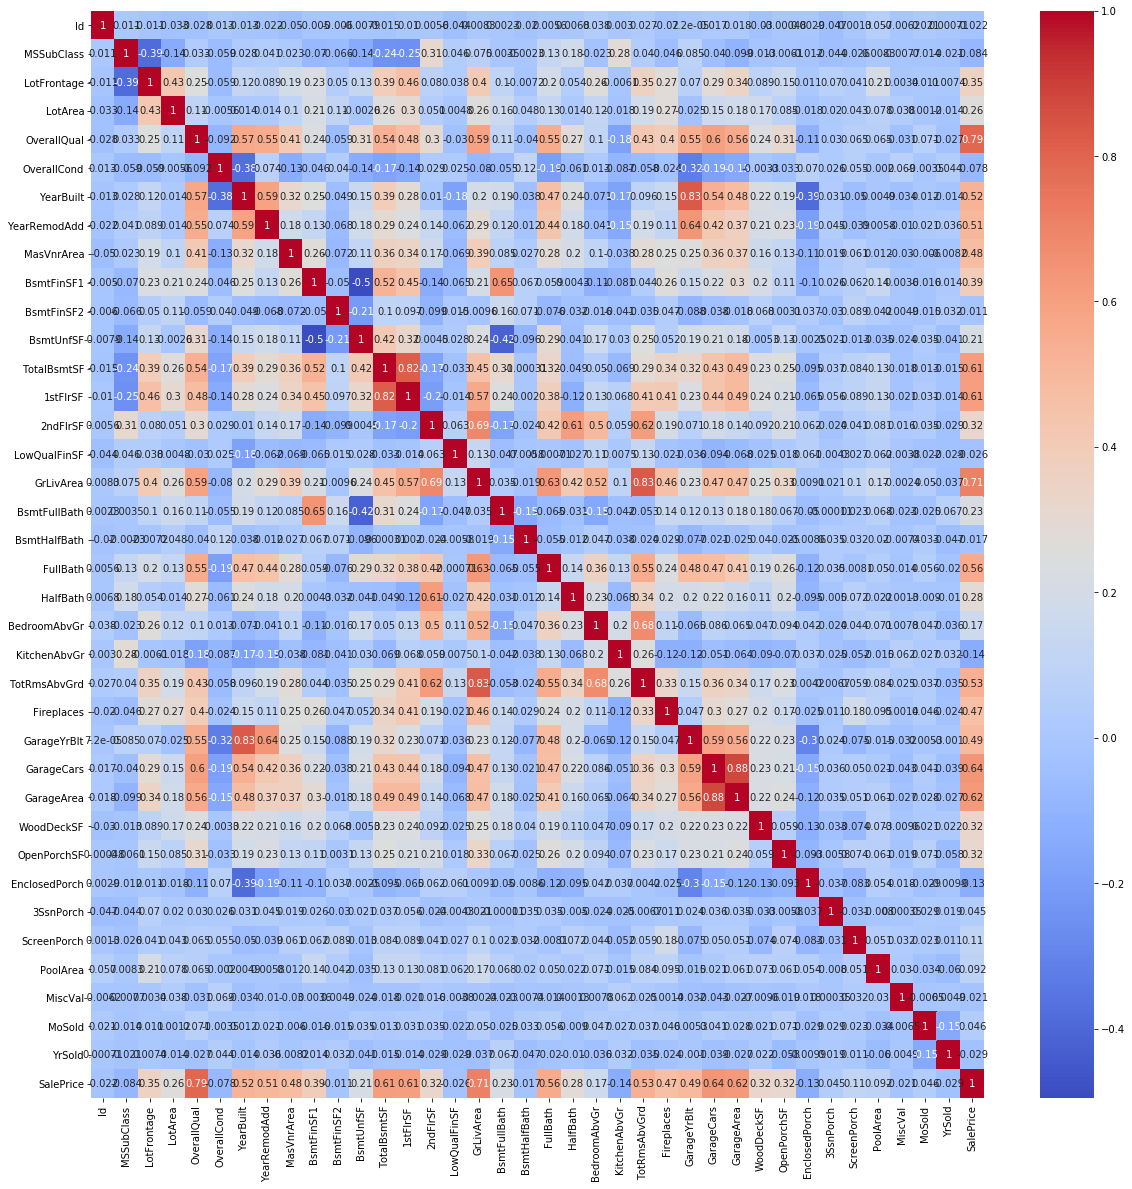

In [6]:
sns.heatmap(data.corr(), annot = True, cmap = "coolwarm")

Ce heatmap avec le tableau de corrélation nous permet de voir à la fois par un jeu de couleur ainsi que le pourcentage les variables qui ont le plus d'influence sur la target price ainsi si nous regardons la dernière colonne de haut en bas on peut noter aisément les features correspondantes. 

### Création d'une nouvelle dataframe avec les variables que nous voulons garder

A la suite du tableau de corrélation nous pouvons sélectionner les features qui nous permettront de travailler sur la target (le prix) ainsi on a pu prendre les features dont les pourcentages dépassaient les 50% et de créer une nouvelle dataframe avec ces mêmes features. 

In [11]:
new_data = data[['SalePrice','YearBuilt','YearRemodAdd','1stFlrSF', 'TotalBsmtSF','OverallQual',"GrLivArea","FullBath","GarageCars", "GarageArea"]]

In [12]:
new_data

,SalePrice,YearBuilt,YearRemodAdd,1stFlrSF,TotalBsmtSF,OverallQual,GrLivArea,FullBath,GarageCars,GarageArea
0,208500,2003,2003,856,856,7,1710,2,2,548
1,181500,1976,1976,1262,1262,6,1262,2,2,460
2,223500,2001,2002,920,920,7,1786,2,2,608
3,140000,1915,1970,961,756,7,1717,1,3,642
4,250000,2000,2000,1145,1145,8,2198,2,3,836
...,...,...,...,...,...,...,...,...,...,...
1455,175000,1999,2000,953,953,6,1647,2,2,460
1456,210000,1978,1988,2073,1542,6,2073,2,2,500
1457,266500,1941,2006,1188,1152,7,2340,2,1,252
1458,142125,1950,1996,1078,1078,5,1078,1,1,240


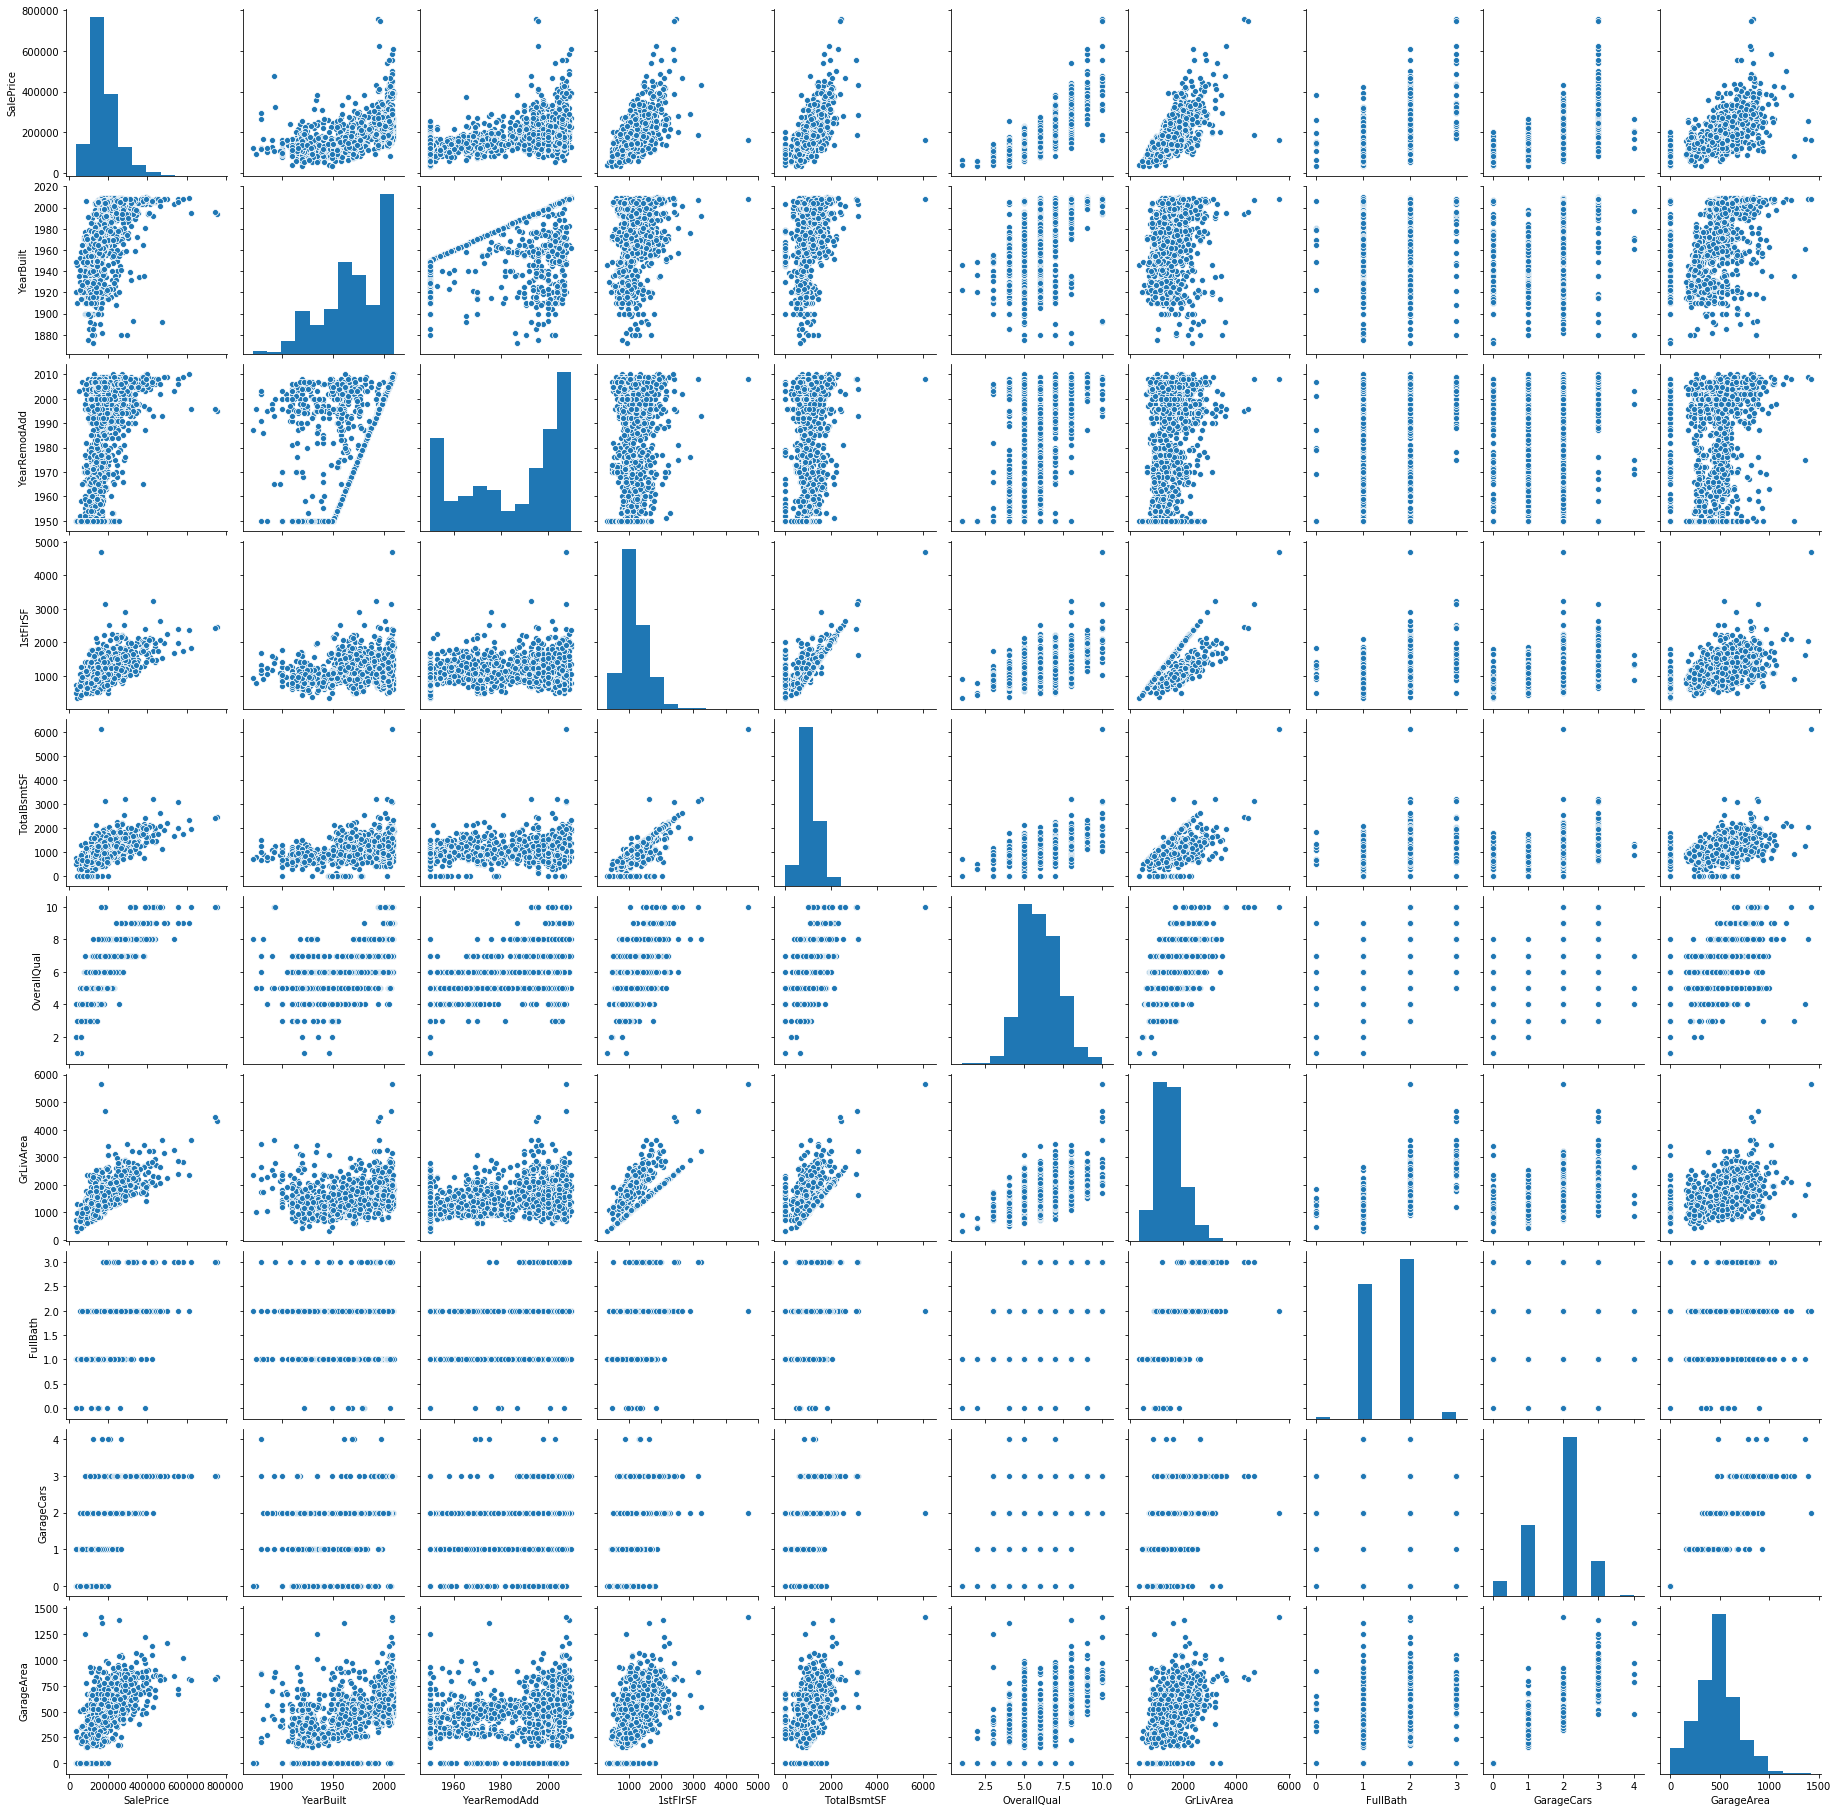

In [13]:
sns.pairplot(new_data)

### Algo de régression linéaire (algo supervisé car cible connu)

Affilier les variables explicatives à la variable X et la cible à la variable y

In [14]:
X = new_data.drop(['SalePrice'], axis = 1)
y = new_data[['SalePrice']]

Séparation du jeu de donnée en test et train

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)


Algo de régression linéaire plus entraînement sur le dataset train

In [18]:
reg_lin_model = LinearRegression()
reg_lin_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Exécution de l'algo puis calcul du rootmean square error ainsi que du r2

In [24]:
y_train_predict = reg_lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print(f'RMSE is {rmse}')
print(f'R2 score is {r2}')
print("\n")


y_test_predict = reg_lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2 = r2_score(y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 38503.24057919465
R2 score is 0.7631810645305324


The model performance for testing set
--------------------------------------
RMSE is 35283.84576940104
R2 score is 0.8081743441434013
